In [1]:
from tensorflow.keras import models,layers,regularizers,metrics
import pandas as pd
import numpy as np

In [2]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow.keras import models,layers,regularizers,metrics

# Common imports
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import sys
import os

# add path for custom functions for easy import
sys.path.append("../Python_for_data_science/UsefulfunctionsPython")

# Neural Networks and Deep Learning
# 10. Introduction to Artificial Neural Networks with Keras

**Backpropagation** : algorithm to train(learn error) *Multilayer Perceptrons*  (deep learning)  

for each training instance, the
backpropagation algorithm first makes a prediction (forward pass) and measures the error, then goes
through each layer in reverse to measure the error contribution from each connection (reverse pass),
and finally tweaks the connection weights to reduce the error (Gradient Descent step).

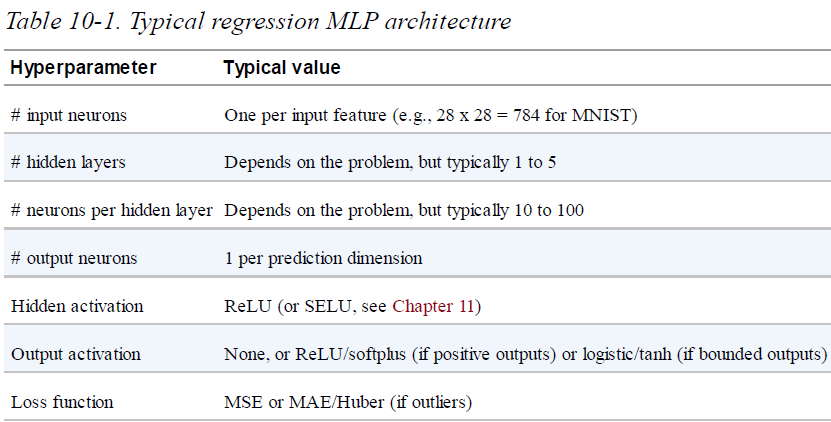

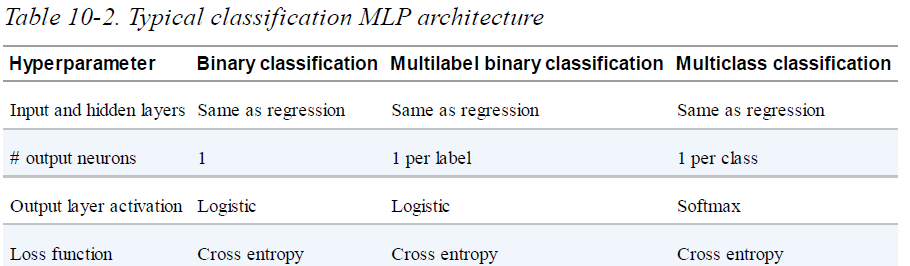

Deep learning library :

Keras is API that work with backend engine like TensorFlow, theano, etc.  
Pytorch is also popular API + engines from facebook

In [3]:
# we will use keras version implemented by tensorFlow team
from tensorflow import keras
keras.__version__ 

'2.2.4-tf'

## Example with Keras Classification : Fashion MNIST image classification

In [7]:
#load data with keras
fashion_mnist = tf.keras.datasets.fashion_mnist
(X,y) , (Xtest,ytest) = fashion_mnist.load_data()
X.shape , X.dtype

((60000, 28, 28), dtype('uint8'))

since we are going to train the neural network using Gradient
Descent, ***we must scale the input features***. For simplicity, we’ll scale the pixel intensities down to the
0–1 range

In [8]:
# split X,y in to train and validation set
Xtrain , Xval= X[5000:]/255 , X[:5000]/255  # devide by max value 255 to makes it in 0-1
ytrain , yval= y[5000:] , y[:5000]

In [12]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [21]:
#the first image in the training set represents a coat:
ytrain[0] ,class_names[ytrain[0]]

(4, 'Coat')

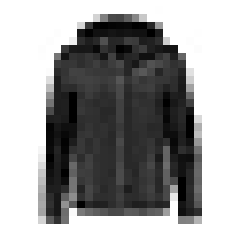

In [23]:
plt.imshow(Xtrain[0], cmap="binary")
plt.axis('off')
plt.show()

In [25]:
# classification MLP with two hidden layers
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))  # "softmax" for muticlass, "sigmoid" for binary

# or pass it in Sequential
# model = keras.models.Sequential([
                                    # keras.layers.Flatten(input_shape=[28, 28]),
                                    # keras.layers.Dense(300, activation="relu"),
                                    # keras.layers.Dense(100, activation="relu"),
                                    # keras.layers.Dense(10, activation="softmax")
                                    # ])

The first line creates a Sequential model. This is the simplest kind of Keras model for
neural networks that are just composed of a single stack of layers connected sequentially.
This is called the Sequential API.

Next, we build the first layer and add it to the model. It is a Flatten layer whose role is to
convert each input image into a 1D array: if it receives input data X, it computes
X.reshape(-1, 1). This layer does not have any parameters; it is just there to do some
simple preprocessing. Since it is the first layer in the model, you should specify the
input_shape, which doesn’t include the batch size, only the shape of the instances.
Alternatively, you could add a keras.layers.InputLayer as the first layer, setting
input_shape=[28,28].

Next we add a Dense hidden layer with 300 neurons. It will use the ReLU activation
function. Each Dense layer manages its own weight matrix, containing all the connection
weights between the neurons and their inputs. It also manages a vector of bias terms (one per
neuron). When it receives some input data, it computes Equation 10-2.
Then we add a second Dense hidden layer with 100 neurons, also using the ReLU activation
function.

Finally, we add a Dense output layer with 10 neurons (one per class), using the softmax
activation function (because the classes are exclusive).

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.layers

In [33]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()
print(hidden1.name),weights

dense


(None,
 array([[ 0.0223158 , -0.03352105,  0.02669309, ..., -0.06958773,
         -0.07258094, -0.02817009],
        [-0.04857974, -0.05002204,  0.04955743, ...,  0.02511395,
          0.01091783,  0.00739525],
        [-0.0059232 ,  0.02604344,  0.00482537, ..., -0.03152025,
         -0.05899241,  0.05354139],
        ...,
        [ 0.04905962,  0.03323015,  0.01455788, ...,  0.07430843,
         -0.04622167,  0.01480616],
        [-0.05094047, -0.02817287,  0.03824581, ...,  0.04072347,
          0.04518092, -0.04512015],
        [ 0.01115239, -0.00449917,  0.00434219, ...,  0.01223318,
         -0.03971261, -0.07010337]], dtype=float32))

Then call its $compile()$ method to specify the loss function and the
optimizer to use

In [34]:
model.compile(loss="sparse_categorical_crossentropy", # "categorical_crossentropy","binary_crossentropy"
              optimizer="sgd",  #optimizer=keras.optimizers.SGD(lr=???) to specify learning rate
              metrics=["accuracy"])

In [36]:
#train
history = model.fit(Xtrain, ytrain, epochs=30,
                    validation_data=(Xval, yval))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 3s 58us/sample - loss: 0.7113 - accuracy: 0.7684 - val_loss: 0.5049 - val_accuracy: 0.8316
Epoch 2/30
55000/55000 [==============================] - 3s 51us/sample - loss: 0.4876 - accuracy: 0.8296 - val_loss: 0.4393 - val_accuracy: 0.8516
Epoch 3/30
55000/55000 [==============================] - 3s 51us/sample - loss: 0.4432 - accuracy: 0.8459 - val_loss: 0.4831 - val_accuracy: 0.8320
Epoch 4/30
55000/55000 [==============================] - 3s 51us/sample - loss: 0.4152 - accuracy: 0.8550 - val_loss: 0.3930 - val_accuracy: 0.8668
Epoch 5/30
55000/55000 [==============================] - 3s 50us/sample - loss: 0.3965 - accuracy: 0.8596 - val_loss: 0.4002 - val_accuracy: 0.8624
Epoch 6/30
55000/55000 [==============================] - 3s 61us/sample - loss: 0.3806 - accuracy: 0.8655 - val_loss: 0.3769 - val_accuracy: 0.8704
Epoch 7/30
55000/55000 [==============================] -

In [37]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [42]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

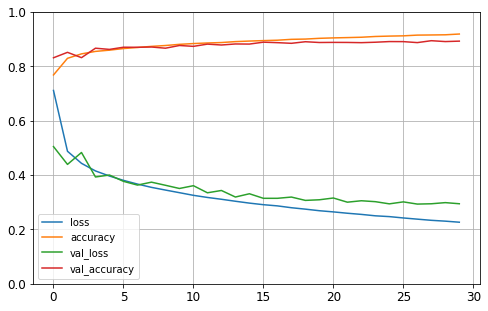

In [39]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [43]:
#evaluate with test set
model.evaluate(Xtest, ytest)

10000/10000 [==============================] - 0s 35us/sample - loss: 64.8183 - accuracy: 0.8468


[64.81831487789154, 0.8468]

Using the model to make predictions

In [46]:
Xnew = Xtest[:3]
y_proba = model.predict(Xnew)
y_proba.round(3)
#the model estimates one probability per class, from class 0 to class 9.

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## Example with Keras Regression : California housing

In [11]:
#load housing data (no cat and missing value version)
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [12]:
X_train.shape[1:]

(8,)

In [6]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [7]:
model.compile(loss="mean_squared_error",
              optimizer="sgd")
#fit
history = model.fit(X_train, y_train, epochs=20,validation_data=(X_valid, y_valid))
# evaluate
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 57us/sample - loss: 0.7286 - val_loss: 19.1530
Epoch 2/20
11610/11610 [==============================] - 0s 32us/sample - loss: 0.4795 - val_loss: 27.2687
Epoch 3/20
11610/11610 [==============================] - 0s 33us/sample - loss: 0.4497 - val_loss: 35.2532
Epoch 4/20
11610/11610 [==============================] - 0s 30us/sample - loss: 0.6911 - val_loss: 0.3695
Epoch 5/20
11610/11610 [==============================] - 0s 31us/sample - loss: 0.3925 - val_loss: 0.3609
Epoch 6/20
11610/11610 [==============================] - 0s 32us/sample - loss: 0.3787 - val_loss: 0.3472
Epoch 7/20
11610/11610 [==============================] - 0s 31us/sample - loss: 0.3806 - val_loss: 0.3467
Epoch 8/20
11610/11610 [==============================] - 0s 32us/sample - loss: 0.3676 - val_loss: 0.3682
Epoch 9/20
11610/11610 [==============================] - 0s 31us/sample - loss: 0.3640 - va

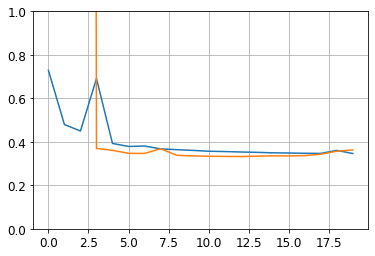

In [10]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [11]:
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

## Building Complex Models Using the Functional API (multiple inputs or outputs)



### Multiple Inputs
Example of a nonsequential neural network, Wide & Deep neural network. It connects all or
part of the inputs directly to the output layer makes it
possible for the neural network to learn both deep patterns (using the deep path) and simple rules
(through the short path) bacause simple patterns in the data may end up being distorted by using one sequence of
transformations.

In [ ]:
# let build to tackle california problem
input_ = keras.layers.Input(shape= X_train.shape[1:])
hidden1 = keras.layers.Dense(30,activation='relu')(input_)
hidden2 = keras.layers.Dense(30,activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_,hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.models.Model(inputs=[input_], outputs=[output])

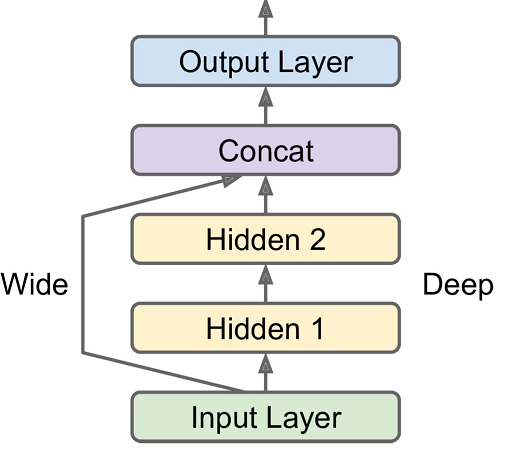

In [95]:
model.compile(loss = 'mean_squared_error',
             optimizer = 'sgd')

history = model.fit(X_train, y_train,epochs = 20, validation_data = (X_valid,y_valid))
mse_test = model.evaluate(X_test, y_test)

5160/5160 [==============================] - 0s 13us/sample - loss: 0.3411


Loss is better than normal model 0.35 -> 0.34

What if you want to send different subsets of input features through the wide or deep paths? We will send 5 features (features 0 to 4), and 6 through the deep path (features 2 to 7). Note that 3 features will go through both (features 2, 3 and 4).

In [96]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

when we call the fit() method,
instead of passing a single input matrix X_train, we must pass a pair of matrices (X_train_A,
X_train_B): one per input.

In [119]:
model.compile(loss = 'mse',
             optimizer = keras.optimizers.SGD(lr=1e-3)) # learning rate
history = model.fit((X_train[:,:5],X_train[:,2:]), y_train,epochs= 20 ,
                    validation_data= ((X_valid[:,:5],X_valid[:,2:]),y_valid))
#eval
mse_test = model.evaluate((X_test[:,:5],X_test[:,2:]), y_test)
y_pred = model.predict ((X_test[:,:5],X_test[:,2:]))

5160/5160 [==============================] - 0s 17us/sample - loss: 0.3699


### Multiple Outputs

Cases where you might want multiple outputs
- you may want to locate and classify the main object in a picture. This is both a regression task (finding the coordinates of the object’s center, as well as its width and height) and a classification task.
- Perform multiple independent tasks usually will get better results perform on all tasks by training a single neural network with one output per task than train one neural network per task . This is because the neural network can learn features in the data that are useful across tasks.
- Regularization technique. add some auxiliary outputs in a neural network architecture to ensure that the underlying part of the network learns something useful on its own

In [10]:
np.random.seed(42)
tf.random.set_seed(42)
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [23]:
# model architecture
input_A = layers.Input(shape = [X_train_A.shape[1]], name = 'wide_input')
input_B = layers.Input(shape = [X_train_B.shape[1]], name = 'deep_input')
hidden1 = layers.Dense(30,activation='relu')(input_B)
hidden2 = layers.Dense(30,activation='relu')(hidden1)
concat = layers.concatenate([input_A,hidden2])
aux_output = layers.Dense(1, name = 'aux_output')(hidden2)
output = layers.Dense(1,name = 'output')(concat)

model = models.Model(inputs = [input_A,input_B],outputs = [output,aux_output])
# complile
model.compile(optimizer=keras.optimizers.SGD(lr=1e-3),loss_weights = [.9,.1], loss = ['mse','mae']) #weight the loss contributions of different model outputs.
#fit
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 65us/sample - loss: 1.9548 - output_loss: 1.8880 - aux_output_loss: 2.5497 - val_loss: 1.4208 - val_output_loss: 1.2964 - val_aux_output_loss: 2.5373
Epoch 2/20
11610/11610 [==============================] - 0s 40us/sample - loss: 0.8898 - output_loss: 0.7170 - aux_output_loss: 2.4473 - val_loss: 0.8010 - val_output_loss: 0.6318 - val_aux_output_loss: 2.3230
Epoch 3/20
11610/11610 [==============================] - 0s 42us/sample - loss: 0.7766 - output_loss: 0.6143 - aux_output_loss: 2.2360 - val_loss: 0.7171 - val_output_loss: 0.5631 - val_aux_output_loss: 2.1019
Epoch 4/20
11610/11610 [==============================] - 0s 41us/sample - loss: 0.7099 - output_loss: 0.5640 - aux_output_loss: 2.0219 - val_loss: 0.6592 - val_output_loss: 0.5231 - val_aux_output_loss: 1.8829
Epoch 5/20
11610/11610 [==============================] - 0s 39us/sample - loss: 0.6591 - output_loss: 0.53

In [39]:
# train and validation loss
for k in history.history.keys():
    print(k,' '*5,np.mean(history.history[k]))

loss       0.6301395211848178
output_loss       0.5517248
aux_output_loss       1.3354843
val_loss       0.5709364522777941
val_output_loss       0.49178442
val_aux_output_loss       1.2820339


In [32]:
# test loss
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])
total_loss, main_loss, aux_loss

5160/5160 [==============================] - 0s 27us/sample - loss: 0.4542 - output_loss: 0.4132 - aux_output_loss: 0.8258


(0.45422612031300863, 0.4132347, 0.8258277)

## Subclassing API to Build Dynamic Models

create the layers you need in the constructor, and use them to
perform the computations you want in the call() method. For example, creating an instance of the
following WideAndDeepModel class gives us an equivalent model to the one we just built with the
Functional API.

In [40]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

## Saving and Restoring a Model
When using the Sequential API or the Functional API, saving a trained Keras model is as simple as it
gets:It also saves the optimizer (including its hyperparameters and any state it may have). You will typically have a script that trains a model and saves it, and one or more scripts (or web services) that load the model and use it to make predictions. Loading the model is just as easy:

Keras will use the HDF5 format to save both the model’s architecture

In [ ]:
# mock up model
model = keras.layers.Sequential([...]) # or keras.Model([...])   
model.compile([...])  
model.fit([...])

In [ ]:
# Save
model.save("my_keras_model.h5")
# Load
model = keras.models.load_model("my_keras_model.h5")

## Using Callbacks to checkpoint for training large data file
the ModelCheckpoint callback saves checkpoints of your
model at regular intervals during training, by default at the end of each epoch:

In [58]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
# complie
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
# create checkpoint
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True) # save only best model
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb], # check point
                   verbose=0) 
model = keras.models.load_model("my_keras_model.h5") # rollback to best model from check point
mse_test = model.evaluate(X_test, y_test)

5160/5160 [==============================] - 0s 23us/sample - loss: 0.4376


### Early stoping

It will
interrupt training when it measures no progress on the validation set for a number of epochs (defined
by the patience argument), and it will optionally roll back to the best model

In [60]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb],
                   verbose = 0)
mse_test = model.evaluate(X_test, y_test)

5160/5160 [==============================] - 0s 17us/sample - loss: 0.3271


## Using TensorBoard for Visualization

To use it, you must modify your program so that it outputs the data you want to visualize to special
binary log files called event files. Each binary data record is called a summary. The TensorBoard
server will monitor the log directory, and it will automatically pick up the changes and update the
visualizations:

Let’s start by defining the root log directory we will use for our TensorBoard logs, plus a small
function that will generate a subdirectory path based on the current date and time so that it’s different
at every run.

In [42]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

In [44]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_06_07-15_15_22'

In [47]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [52]:
#The good news is that Keras provides a nice TensorBoard() callback:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb],
                   verbose=0) # not show process bar for epoch

In [53]:
# Launch by type this in terminal and copy the local host link
# $ tensorboard --logdir=./my_logs --port=6006

# # Launching TensorBoard server
# %load_ext tensorboard
# %tensorboard --logdir=./my_logs --port=6006

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 1712.

In [54]:
# test_logdir = get_run_logdir()
# writer = tf.summary.create_file_writer(test_logdir)
# with writer.as_default():
#     for step in range(1, 1000 + 1):
#         tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
#         data = (np.random.randn(100) + 2) * step / 100 # some random data
#         tf.summary.histogram("my_hist", data, buckets=50, step=step)
#         images = np.random.rand(2, 32, 32, 3) # random 32×32 RGB images
#         tf.summary.image("my_images", images * step / 1000, step=step)
#         texts = ["The step is " + str(step), "Its square is " + str(step**2)]
#         tf.summary.text("my_text", texts, step=step)
#         sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
#         audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
#         tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

## Fine-Tuning Neural Network Hyperparameters

In [57]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

Here are some Python libraries you can use to optimize hyperparameters:
- Hyperopt

A popular library for optimizing over all sorts of complex search spaces (including real values,
such as the learning rate, and discrete values, such as the number of layers).
- Hyperas, kopt, or Talos

Useful libraries for optimizing hyperparameters for Keras models (the first two are based on
Hyperopt).
- Keras Tuner

An easy-to-use hyperparameter optimization library by Google for Keras models, with a hosted
service for visualization and analysis.
- Scikit-Optimize (skopt)

A general-purpose optimization library. The BayesSearchCV class performs Bayesian
optimization using an interface similar to GridSearchCV.
- Spearmint

A Bayesian optimization library.
- Hyperband

A fast hyperparameter tuning library based on the recent Hyperband paper by Lisha Li et al.
- Sklearn-Deap

A hyperparameter optimization library based on evolutionary algorithms, with a GridSearchCVlike
interface.

## Guideline for choosing hidden layers and neurons in an MLP and for selecting good values

### 1.Number of Hidden Layers
for many problems you can start with just one or two hidden layers and the neural
network will work just fine  
For
more complex problems, you can ramp up the number of hidden layers until you start overfitting the
training set. Very complex tasks, such as large image classification or speech recognition, typically
require networks with dozens of layers and they need a huge amount of training data.

### 2.Number of Neurons per Hidden Layer

As for the hidden layers, it’s often simpler and more efficient to pick a model with
more layers and neurons than you actually need, then use early stopping and other regularization
techniques to prevent it from overfitting.  

With this approach, you avoid
bottleneck layers that could ruin your model. On the flip side, if a layer has too few neurons, it will
not have enough representational power to preserve all the useful information from the inputs

### 3.Learning Rate, Batch Size, and Other Hyperparameters

#### Learning rate
One way to find a good learning rate is to train the
model for a few hundred iterations, starting with a very low learning rate (e.g., $10^{-5}$ ) and
gradually increasing it up to a very large value (e.g., 10). This is done by multiplying the learning
rate by a constant factor at each iteration (e.g., by $exp(log(10^6 )/500)$

If you plot the loss as a function of the learning rate (using a log scale for the learning
rate), you should see it dropping at first. But after a while, the learning rate will be too large, so
the loss will shoot back up: the optimal learning rate will be a bit lower than the point at which
the loss starts to climb

### Batch size
one strategy is to try to use a large batch size, using learning rate warmup (starting training with a small learning rate, then ramping it up),
and if training is unstable or the final performance is disappointing, then try using a small batch
size(2 to 32) instead.

# 11. Challenges in Training Deep Neural Networks

In [15]:
# load dataset
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

## The Vanishing/Exploding Gradients Problems (unstable gradient)

Back propagation uses gradients to
update each parameter with a Gradient Descent step.  
Unfortunately, gradients often get smaller and smaller as the algorithm progresses down to the lower
layers.  
As a result, the Gradient Descent update leaves the lower layers’ connection weights virtually unchanged, and training never converges to a good solution. We call this the *vanishing gradients*
problem.

In some cases, the opposite can happen: the gradients can grow bigger and bigger until
layers get insanely large weight updates and the algorithm diverges. This is the *exploding gradients*
problem,

### RELU
it does not saturate
for positive values (and because it is fast to compute). However during training, some neurons effectively “die,” meaning they stop outputting anything
other than 0.

### ELU
The ELU activation function looks a lot like the ReLU function, with a few major differences:
It takes on negative values when z < 0, which allows the unit to have an average output
closer to 0 and helps alleviate the vanishing gradients problem. The hyperparameter α
defines the value that the ELU function approaches when z is a large negative number. It is
usually set to 1.  

It has a nonzero gradient for z < 0, which avoids the dead neurons problem

###  SELU (Scaled ELU) activation
The scaled variant of the ELU activation function. The ELU activation function looks a lot like the ReLU function, with a few major differences:  
It takes on negative values when z < 0, which allows the unit to have an average output
closer to 0 and helps alleviate the vanishing gradients problem. The hyperparameter α
defines the value that the ELU function approaches when z is a large negative number.  
It is
usually set to 1, but you can tweak it like any other hyperparameter.  

It has a nonzero gradient for z < 0, which avoids the dead neurons problem.  

If α is equal to 1 then the function is smooth everywhere, including around z = 0, which helps
speed up Gradient Descent since it does not bounce as much to the left and right of z = 0.

In [10]:
# For SELU activation, set activation="selu" and kernel_initializer="lecun_normal" when creating a layer:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"))

for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))
    
model.add(keras.layers.Dense(10, activation="softmax"))
# compile 
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [16]:
# scale data to mean0 and sd 1 first
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [17]:
# fit 
history = model.fit(X_train_scaled, y_train, epochs=5,validation_data=(X_valid_scaled, y_valid), verbose=0)

In [22]:
np.mean(history.history['accuracy'])

0.69172

### What activation function to use in deep learning
in general SELU > ELU > leaky ReLU (and its variants) > ReLU > tanh > logistic. If the network’s architecture
prevents it from self-normalizing, then ELU may perform better than SELU (since SELU is not smooth at z = 0). If you
care a lot about runtime latency, then you may prefer leaky ReLU. If you don’t want to tweak yet another hyperparameter,
you may use the default α values used by Keras (e.g., 0.3 for leaky ReLU). If you have spare time and computing power,
you can use cross-validation to evaluate other activation functions, such as RReLU if your network is overfitting or PReLU
if you have a huge training set. That said, because ReLU is the most used activation function (by far), many libraries and
hardware accelerators provide ReLU-specific optimizations; therefore, if speed is your priority, ReLU might still be the best
choice.

### Batch Normalization (BN)

Even we Normalization data before put in first layer, each activation function might explode the weight.

So during training, BN standardizes its inputs, then rescales and offsets them.
Then estimate these mean and standard deviation of each
input of the BN layer during training by using a
moving average of the layer’s input means and standard deviations. . These “final” input means and standard deviations could then be used instead of
the batch input means and standard deviations when making predictions. It remove the need of nomalization of the data before training

Benefits  
- Regularization
- Network converge(train) faster
- so we can create deeper network

In [71]:
# Just add a BatchNormalization layer before or after each hidden layer’s activation function, and optionally add a BN layer as well as the first layer in your model.
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(), # BN
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
    ])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 784)               3136      
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
batch_normalization_4 (Batch (None, 300)               1200      
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
batch_normalization_5 (Batch (None, 100)               400       
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

### Gradient Clipping

clip the gradients during
backpropagation so that they never exceed some threshold (explode gradient)  

This optimizer will clip every component of the gradient vector to a value between –1.0 and 1.0 (specify in clipvalue) (potentially change vector direction)   
To ensure that Gradient Clipping does not change the direction of the gradient vector,
you should clip by norm by setting clipnorm instead of clipvalue

In [ ]:
# set clipvalue or clipnorm
optimizer = keras.optimizers.SGD(clipvalue=1.0)
model.compile(loss="mse", optimizer=optimizer)

## Reusing Pretrained Layers (transfer learning)
Reuse the lower layers of this network with pretrained from others people, called transfer learning. Not only speed up training, but require
significantly less training data.

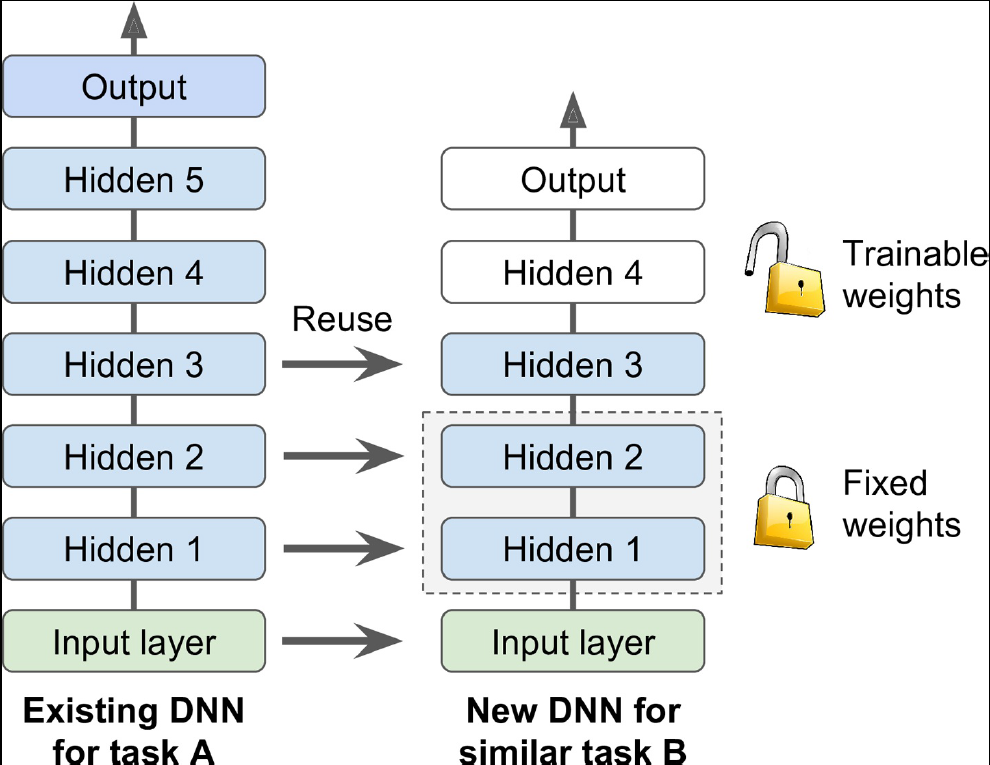

Try freezing all the reused layers first (i.e., make their weights non-trainable so that Gradient Descent
won’t modify them), then train your model and see how it performs. Then try unfreezing one or two of
the top hidden layers to let backpropagation tweak them and see if performance improves. The more
training data you have, the more layers you can unfreeze. It is also useful to reduce the learning rate
when you unfreeze reused layers: this will avoid wrecking their fine-tuned weights

### Transfer learning with Keras

Suppose trained model A is similar task to model B

In [ ]:
# resue model A
model_A = models.load_model('my_model_A.h5') # load 
model_A_clone = keras.models.clone_model(model_A) # clone new_A so it will not affect A
model_A_clone.set_weights(model_A.get_weights()) # its weights (since clone_model() does not clone the weights):
model_B_on_A = models.Sequential(model_A_clone.layer[:-1]) #drop last layer of model A
model_B_on_A.add(layers.Dense(1, activation="sigmoid")) # add new last layer to model B

since the new output layer was initialized
randomly it will make large errors (at least during the first few epochs). To avoid this, one approach is to freeze the reused
layers during the first few epochs, giving the new layer some time to learn reasonable weights

In [ ]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False
# then complie
model_B_on_A.compile(loss="binary_crossentropy", optimizer="sgd",metrics=["accuracy"])

Now you can train the model for a few epochs, then unfreeze the reused layers (which requires
compiling the model again) and continue training to fine-tune the reused layers for task B

After
unfreezing the reused layers, it is usually a good idea to reduce the learning rate, once again to avoid
damaging the reused weights:

In [ ]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4, validation_data=(X_valid_B, y_valid_B))
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True
# reduce learning rate
optimizer = keras.optimizers.SGD(lr=1e-4) # the default lr is 1e-2
#complite
model_B_on_A.compile(loss="binary_crossentropy", optimizer=optimizer,metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,validation_data=(X_valid_B, y_valid_B))

**Summary** :transfer learning does not work well with small dense
networks, presumably because small networks learn few patterns, and dense networks learn very
specific patterns, which are unlikely to be useful in other tasks.   
Transfer learning works best with
deep convolutional neural networks, which tend to learn feature detectors that are much more general
(especially in the lower layers)

## Unsupervised Pretraining
good option when you have a complex task to
solve, no similar model you can reuse, and little labeled training data but plenty of unlabeled training
data.

use the unlabeled data to
train an unsupervised model, such as an autoencoder or a generative adversarial network (GANs). Then you can reuse the lower layers of the autoencoder or the lower layers of the GAN’s
discriminator, add the output layer for your task on top, and fine-tune the final network using
supervised learning

## Faster Optimizers
instead of using Gradient Descent optimizer, others optimizers are below

###  Momentum Optimization
regular Gradient Descent will simply take small, regular steps down
the slope, so the algorithm will take much more time to reach the bottom

Momentum optimization cares  about what previous gradients were: at each iteration, it
subtracts the local gradient from the momentum vector m (multiplied by the learning rate η), and it
updates the weights by adding this momentum vector.   
In other words, the gradien is used for acceleration, not for speed.   
**typical momentum
value is 0.9.**

In [ ]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)

### Nesterov Accelerated Gradient
measures the gradient of the cost function
not at the local position θ but slightly ahead in the direction of the momentum and NAG ends up being significantly faster than regular momentum
optimization.

In [ ]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)
# or
optimizer="nadam"

###  Adam and Nadam Optimization

This algorithm scale down the gradient vector along the steepest dimensions which cumulating only the gradients from the
most recent iterations

Since Adam is an adaptive learning rate algorithm (like AdaGrad and RMSProp), it requires less
tuning of the learning rate hyperparameter η. You can often use the default value η = 0.001, making
Adam even easier to use than Gradient Descent.

In [ ]:
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

## Learning Rate Scheduling
Instead of try many learning rate and choose optimal one from learning curve. (Constance rate)  
Start with a large learning rate and then
reduce it once training stops making fast progress, will converge to good solutions faster (Learning schedules)



In [ ]:
# set the decay hyperparameterwhen creating an optimizer
optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-4)

### Exponential scheduling
The learning rate will gradually drop by a factor of 10
every s steps

The decay is the inverse of s (the number of steps it takes to divide the learning rate by one more
unit)

In [2]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

Next, create a LearningRateScheduler callback, giving it the schedule function, and pass this
callback to the fit() method:

In [ ]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, [...], callbacks=[lr_scheduler])

## Avoiding Overfitting Through Regularization
thousands of parameters can fit a huge complex datasets. But this   flexibility also makes the
network prone to overfitting the training set

### Regularization
use regularization to constrain a neural network's connection weights. l1 to drive down some weight to 0(sparse model), l2 to constrain the weight 

In [ ]:
layer = layers.Dense(100, activation='elu',
                    kernel_initializer='he_normal',
                    kernel_regularizer= keras.regularizers.l2(0.01)) # add l2 regularizers

In [ ]:
# apply both l1 and l2
keras.regularizers.l1_l2(l1= 0.01,l2= 0.2 )

Use Python’s
functools.partial() function to write regularizers and activation function for every layers to avoid writing repeat codes

In [3]:
from functools import partial
RegularizedDense = partial(keras.layers.Dense,
                                activation="elu",
                                kernel_initializer="he_normal",
                                kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28, 28]),
        RegularizedDense(300),
        RegularizedDense(100),
        RegularizedDense(10, activation="softmax",
        kernel_initializer="glorot_uniform")
])

### Dropout
at every and only *training* step, every neuron (including the input neurons, but
always excluding the output neurons) has a probability p of being temporarily “dropped out,” meaning
it will be entirely ignored during this training step, but it may be active during the next step

- force network to not rely only some neurons, hence less sensitive to slight change in inputs and generalize better

In [23]:
# dropout rate of 0.2 : meaning random 20% of all neurons and set weight to 0 
model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dropout(rate=0.2),
        keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
        keras.layers.Dropout(rate=0.2),
        keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
        keras.layers.Dropout(rate=0.2),
        keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),verbose = 0)

make sure to
evaluate the training loss without dropout(e.g., after training). Because model with drop out may be overfitting the training set and yet have similar training and validation losses

In [24]:
np.mean(history.history['accuracy'])

0.8246727

### Monte Carlo (MC) Dropout
Stack n(100) predictions from a model with dropout activated(training = True). The predictions will be different since dropout is random process. Then we average all the predictions. 

If you are building a risk-sensitive application, or inference latency is not very important in
your application, you can use MC Dropout to boost performance and get more reliable
probability estimates, along with uncertainty estimates.

In [25]:
y_probas = np.stack([model(X_test_scaled, training=True) for sample in range(100)])
y_proba  = y_probas.mean(axis=0)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [26]:
# prediction with out aggregate samples
np.round(model.predict(X_test_scaled[:1]), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.11, 0.  , 0.88]],
      dtype=float32)

In [27]:
# prediction from sample aggregation
np.round(y_proba[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.17, 0.  , 0.81]],
      dtype=float32)

The model simple more unsure about the class which is a good thing

In [28]:
# can also look at the standard deviation of probability estimates
y_std = y_probas.std(axis=0)
np.round(y_std[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.14, 0.  , 0.15]],
      dtype=float32)

In [31]:
y_pred = np.argmax(y_proba, axis=1)
accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

0.8579

accuracy went up from dropout .824 to Monte Carlo dropout .857

Reference if you have Batch normalization and want to do Monte Carlo dropout [Link](https://github.com/ageron/handson-ml2/blob/master/11_training_deep_neural_networks.ipynb)

## Practice Guideline
**For deep neural networks**  

| Hyperparameter         | Default value                               | Syntax                                          |
|------------------------|---------------------------------------------|-------------------------------------------------|
| Kernel initializer     | He initialization                           | kernel_initializer="he_normal"                  |
| Activation function    | ELU                                         | activation="elu"                                |
| Normalization          | None if shallow; Batch Norm if deep         | keras.layers.BatchNormalization()               |
| Regularization         | Early stopping (+ℓ reg. if needed)          | kernel_regularizer= keras.regularizers.l2(0.01) |
| Optimizer              | Momentum optimization (or RMSProp or Nadam) | optimizer="nadam"                               |
| Learning rate schedule | 1cycle                                      |                                                 |


Don’t forget to normalize the input features! You should also try to reuse parts of a pretrained neural
network if you can find one that solves a similar problem, or use unsupervised pretraining if you have
a lot of unlabeled data, or use pretraining on an auxiliary task if you have a lot of labeled data for a
similar task.

**For simple stack of dense layers**

| Hyperparameter         | Default value                               | Syntax                            |
|------------------------|---------------------------------------------|-----------------------------------|
| Kernel initializer     | LeCun initialization                        | kernel_initializer="lecun_normal" |
| Activation function    | SELU                                        | activation="selu"                 |
| Normalization          | None (self-normalization)                   |                                   |
| Regularization         | Alpha dropout if needed                     | keras.layers.Dropout(rate=0.2)    |
| Optimizer              | Momentum optimization (or RMSProp or Nadam) | optimizer="nadam"                 |
| Learning rate schedule | 1cycle                                      |                                   |

# 12. Custom Models and Training TensorFlow
when you need extra
control to write custom loss functions, custom metrics, layers, models, initializers, regularizers,
weight constraints, and more. You may even need to fully control the training loop itself, for example
to apply special transformations or constraints to the gradients (beyond just clipping them) or to use
multiple optimizers for different parts of the network

## Tensors and Operations
A tensor is usually a multidimensional array (exactly like a NumPy ndarray),

In [36]:
# create tensors
t = tf.constant([[1., 2., 3.], [4., 5., 6.]]) # matrix
t

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [35]:
tf.constant(42)

<tf.Tensor: shape=(), dtype=int32, numpy=42>

In [37]:
t.shape

TensorShape([2, 3])

In [43]:
# index work same as numpy
t[:,1, tf.newaxis] # get middle column and transpose it

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [46]:
t +10 == tf.add(t,10) 

<tf.Tensor: shape=(2, 3), dtype=bool, numpy=
array([[ True,  True,  True],
       [ True,  True,  True]])>

tf must add reduce since it is approximate  
tf.reduce_mean(), tf.reduce_sum(), tf.reduce_max(), and tf.math.log() are the equivalent
of np.mean(), np.sum(), np.max() and np.log()

apply TensorFlow operations to NumPy arrays and NumPy operations to tensors

In [51]:
a = np.array([2.,4.,5.])
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [54]:
t.numpy() # or np.array(t)

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [55]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [56]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

## Type Conversions strict
you cannot add a float tensor and an integer tensor, and you cannot even add a 32-bit by default float
and a 64-bit float.
**Note** tensor is 32-bit (faster)

In [ ]:
tf.constant(2.) + tf.constant(40) # result in error

Cast to change type

In [61]:
t2 = tf.constant(40.,dtype= tf.float64)
tf.constant(2.0) + tf.cast(t2, tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

## Variables
The tf.Tensor values we’ve seen so far are immutable: you cannot modify them. This means that we
cannot use regular tensors to implement weights in a neural network, since they need to be tweaked by
backpropagation. Plus, other parameters may also need to change over time

In [63]:
v = tf.Variable([[1., 2., 3.], [4., 5., 6.]])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

tf.Variable can be modified with assign(), or individual cell's scatter_nd_update()

In [64]:
v.assign(2 * v) # chagne v inplace

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [65]:
v[:, 2].assign([0., 1.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>

In [66]:
v.scatter_nd_update(indices=[[0, 0], [1, 2]],
                    updates=[100., 200.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,   4.,   0.],
       [  8.,  10., 200.]], dtype=float32)>

## Customizing Models and Training Algorithms
### Custom loss functions

When dataset is still noisy. The mean squared error
might penalize large errors too much and cause your model to be imprecise.   
The mean absolute error
would not penalize outliers as much, but training might take a while to converge, and the trained
model might not be very precise.

Huber loss is combination of both MSE and MAE, Lets try implement it

In [68]:
def create_huber(threshold=1.0): # specify threshold
    def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < threshold
    squared_loss = tf.square(error) / 2
    linear_loss = threshold * tf.abs(error) - threshold**2 / 2
    return tf.where(is_small_error, squared_loss, linear_loss)
return huber_fn

Now you can use this loss when you compile the Keras model, then train your model:

For each batch during training, Keras will call the huber_fn() function to compute the
loss and use it to perform a Gradient Descent step. Moreover, it will keep track of the total loss since
the beginning of the epoch, and it will display the mean loss.

In [ ]:
model.compile(loss=huber_fn, optimizer="nadam")
model.fit(X_train, y_train, [...])

#### Saving and Loading Models That Contain Custom Components
when you load a model containing custom objects, you need to map the
names to the objects:

In [2]:
from tensorflow.keras.models import load_model, save_model

In [ ]:
model = load_model("my_model_with_a_custom_loss_threshold_2.h5",
                                custom_objects={"huber_fn": create_huber(2.0)}) #specify the threshold value when loading the model

### Custom Metrics

Losses and metrics are conceptually not the same thing: losses (e.g., cross entropy) are used by
Gradient Descent to train a model, so they must be differentiable (at least where they are evaluated),
and their gradients should not be 0 everywhere. Plus, it’s OK if they are not easily interpretable by
humans. In contrast, metrics (e.g., accuracy) are used to evaluate a model: they must be more easily
interpretable, and they can be non-differentiable or have 0 gradients everywhere.

In [ ]:
402

## Custom Layers

# 13. Loading and Preprocessing Data with TensorFlow

Data API: you just create a dataset object, and tell it where to get the data and how to transform
it. TensorFlow takes care of all the implementation details, such as multithreading, queuing, batching,
and prefetching. Moreover, the Data API works seamlessly with tf.keras!


**TF Transform (tf.Transform)**  
Makes it possible to write a single preprocessing function that can be run in batch mode on your
full training set, before training (to speed it up), and then exported to a TF Function and
incorporated into your trained model so that once it is deployed in production it can take care of
preprocessing new instances on the fly.

**TF Datasets (TFDS)**  
Provides a convenient function to download many common datasets of all kinds, including large
ones like ImageNet, as well as convenient dataset objects to manipulate them using the Data API.

## The Data API


In [3]:
import tensorflow as tf

## Generator to read big dataset

In [13]:
# import dataset to ram
dataset = tf.data.Dataset.from_tensor_slices(tf.range(10),)
dataset

<TensorSliceDataset shapes: (), types: tf.int32>

from_tensor_slices() function takes a tensor and creates a tf.data.Dataset which we can iterate on

In [6]:
# iterate over dataset
for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


### Chaining Transformations
Once you have a dataset, you can apply all sorts of transformations to it by calling its transformation
methods. Each method returns a new dataset, so you can chain transformations

In [12]:
# create mini batch for training
dataset = dataset.repeat(3).batch(7) # repeat all item for 3 times, 7 items per tensor 
for iteam in dataset:
    print(iteam)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int32)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int32)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int32)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int32)
tf.Tensor([8 9 0 1 2 3 4], shape=(7,), dtype=int32)
tf.Tensor([5 6 7 8 9 0 1], shape=(7,), dtype=int32)
tf.Tensor([2 3 4 5 6 7 8], shape=(7,), dtype=int32)
tf.Tensor([9 0 1 2 3 4 5], shape=(7,), dtype=int32)
tf.Tensor([6 7 8 9 0 1 2], shape=(7,), dtype=int32)
tf.Tensor([3 4 5 6 7 8 9], shape=(7,), dtype=int32)
tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int32)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int32)
tf.Tensor([4 5 6 7 8 9], shape=(6,), dtype=int32)


In [82]:
#applies a transformation to each item
dataset = dataset.map(lambda x: x * 2)
#applies a transformation as a whole
dataset = dataset.apply(tf.data.experimental.unbatch())
# filter
dataset = dataset.filter(lambda x: x<10)

Instructions for updating:
Use `tf.data.Dataset.unbatch()`.


In [84]:
for item in dataset.take(3): # see the first 3 tensor
    print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)


## Split dataset to multiple CSV files

Gradient Descent works best when the instances in the training set are independent and
identically distributed.    
A simple way to ensure this is to shuffle the instances, using
the shuffle() method. It will create a new dataset that will start by filling up a buffer with the first
items of the source dataset.

For a very large dataset that does not fit in memory, split files into many CSV that can fit into memory

In [87]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_mean = scaler.mean_
X_std = scaler.scale_

In [89]:
# splitting the housing dataset and save it to 20 CSV files
def save_to_multiple_csv_files(data, name_prefix, header=None, n_parts=10):
    housing_dir = os.path.join("datasets", "housing")
    os.makedirs(housing_dir, exist_ok=True)
    path_format = os.path.join(housing_dir, "my_{}_{:02d}.csv")

    filepaths = []
    m = len(data)
    for file_idx, row_indices in enumerate(np.array_split(np.arange(m), n_parts)):
        part_csv = path_format.format(name_prefix, file_idx)
        filepaths.append(part_csv)
        with open(part_csv, "wt", encoding="utf-8") as f:
            if header is not None:
                f.write(header)
                f.write("\n")
            for row_idx in row_indices:
                f.write(",".join([repr(col) for col in data[row_idx]]))
                f.write("\n")
    return filepaths

In [90]:
train_data = np.c_[X_train, y_train]
valid_data = np.c_[X_valid, y_valid]
test_data = np.c_[X_test, y_test]
header_cols = housing.feature_names + ["MedianHouseValue"]
header = ",".join(header_cols)

train_filepaths = save_to_multiple_csv_files(train_data, "train", header, n_parts=20)
valid_filepaths = save_to_multiple_csv_files(valid_data, "valid", header, n_parts=10)
test_filepaths = save_to_multiple_csv_files(test_data, "test", header, n_parts=10)

In [92]:
train_filepaths

['datasets\\housing\\my_train_00.csv',
 'datasets\\housing\\my_train_01.csv',
 'datasets\\housing\\my_train_02.csv',
 'datasets\\housing\\my_train_03.csv',
 'datasets\\housing\\my_train_04.csv',
 'datasets\\housing\\my_train_05.csv',
 'datasets\\housing\\my_train_06.csv',
 'datasets\\housing\\my_train_07.csv',
 'datasets\\housing\\my_train_08.csv',
 'datasets\\housing\\my_train_09.csv',
 'datasets\\housing\\my_train_10.csv',
 'datasets\\housing\\my_train_11.csv',
 'datasets\\housing\\my_train_12.csv',
 'datasets\\housing\\my_train_13.csv',
 'datasets\\housing\\my_train_14.csv',
 'datasets\\housing\\my_train_15.csv',
 'datasets\\housing\\my_train_16.csv',
 'datasets\\housing\\my_train_17.csv',
 'datasets\\housing\\my_train_18.csv',
 'datasets\\housing\\my_train_19.csv']

## Building Input Pipeline

**Read in from multiple csv files**

In [93]:
train_filepaths = "datasets/housing/my_train_*.csv" # specify location
filepath_dataset = tf.data.Dataset.list_files(train_filepaths, seed=42) # create dataset

In [95]:
n_readers = 5 # read five files at a time
dataset = filepath_dataset.interleave( 
    lambda filepath: tf.data.TextLineDataset(filepath).skip(1), # skip header of each file
    cycle_length=n_readers,
    num_parallel_calls=4) # threds to parallel

In [96]:
for line in dataset.take(5):
    print(line.numpy())

b'4.7361,7.0,7.464968152866242,1.1178343949044587,846.0,2.694267515923567,34.49,-117.27,1.745'
b'3.6641,17.0,5.577142857142857,1.1542857142857144,511.0,2.92,40.85,-121.07,0.808'
b'4.5909,16.0,5.475877192982456,1.0964912280701755,1357.0,2.9758771929824563,33.63,-117.71,2.418'
b'3.6875,44.0,4.524475524475524,0.993006993006993,457.0,3.195804195804196,34.04,-118.15,1.625'
b'2.3,25.0,5.828178694158075,0.9587628865979382,909.0,3.1237113402061856,36.25,-119.4,1.328'


### **Preprocess data**

In [107]:
n_inputs = 8

def preprocess(line): # takes one CSV line and starts by parsing it
    # set the default value if null, here set the first 8 field(feature) to 0 if null,
    #and tf.constant mean last field(target) cannot be null or raise error
    defs = [0.] * n_inputs + [tf.constant([], dtype=tf.float32)]
    # parse line from csv to replace with default
    fields = tf.io.decode_csv(line, record_defaults=defs)
    x = tf.stack(fields[:-1]) # stack tensor into 1D array
    y = tf.stack(fields[-1:])
    return (x - X_mean) / X_std, y

Sample preprocess, the null value will be set to 0 then normalize

In [108]:
preprocess(b',,,0.9171,846.0,2.3370,37.47,-122.2,2.782')

(<tf.Tensor: shape=(8,), dtype=float32, numpy=
 array([-2.0383456 , -2.264436  , -2.1392636 , -0.39215982, -0.5277444 ,
        -0.2633488 ,  0.8543046 , -1.3072058 ], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([2.782], dtype=float32)>)

**Build input pipeline that reusable**

load data from
multiple CSV files, preprocess it, shuffle it, optionally repeat it, and batch it

In [109]:
def csv_reader_dataset(filepaths, repeat=1, n_readers=5,
                       n_read_threads=None, shuffle_buffer_size=10000,
                       n_parse_threads=5, batch_size=32):
    dataset = tf.data.Dataset.list_files(filepaths).repeat(repeat)
    dataset = dataset.interleave(
        lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
        cycle_length=n_readers, num_parallel_calls=n_read_threads)
    dataset = dataset.shuffle(shuffle_buffer_size)
    dataset = dataset.map(preprocess, num_parallel_calls=n_parse_threads)
    dataset = dataset.batch(batch_size)
    return dataset.prefetch(1)

**Prefetching**  
By calling prefetch(1) at the end, we are creating a dataset that will do its best to always be one
batch ahead. In other words, while our training algorithm is working on one batch, the dataset will
already be working in parallel on getting the next batch ready

## Using the Dataset with tf.keras

In [110]:
train_set = csv_reader_dataset(train_filepaths)
valid_set = csv_reader_dataset(valid_filepaths)
test_set = csv_reader_dataset(test_filepaths)

fit model

In [118]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1),
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
# specify batch_size
batch_size = 32
model.fit(train_set, steps_per_epoch=len(X_train) // batch_size, epochs=10,verbose = 0,validation_data=valid_set)

In [119]:
model.evaluate(test_set, steps=len(X_test) // batch_size)

161/161 [==============================] - 0s 686us/step - loss: 0.4784


0.4784057267149043

### The TFRecord Format
TFRecord format is TensorFlow’s preferred format for storing large amounts of data and reading
it efficiently.

In [120]:
# write
with tf.io.TFRecordWriter("my_data.tfrecord") as f:
    f.write(b"This is the first record")
    f.write(b"And this is the second record")

In [121]:
# read

filepaths = ["my_data.tfrecord"]
dataset = tf.data.TFRecordDataset(filepaths)
for item in dataset:
    print(item)

tf.Tensor(b'This is the first record', shape=(), dtype=string)
tf.Tensor(b'And this is the second record', shape=(), dtype=string)


In [ ]:
page 434

## Preprocessing the Input Features
Let's include a preprocessing layer directly in model

### Standardize layer

In [ ]:
# create self-contained custom layer
class Standardization(keras.layers.Layer):
    def adapt(self, data_sample):
        self.means_ = np.mean(data_sample, axis=0, keepdims=True)
        self.stds_ = np.std(data_sample, axis=0, keepdims=True)
    def call(self, inputs):
        return (inputs - self.means_) / (self.stds_ + keras.backend.epsilon())

need to adapt it to your dataset by calling the adapt() method, before use

in general, a few hundred randomly selected instances will suffice

In [ ]:
std_layer = Standardization()
std_layer.adapt(data_sample)

In [ ]:
# use this preprocessing layer like a normal layer
model = keras.Sequential()
model.add(std_layer)
[...] # create the rest of the model
model.compile([...])
model.fit([...])

Or use buildin keras.layers.Normalization 

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import Normalization

###  Encoding Categorical Features Using One-Hot Vectors
map each
category to its index (0 to n), using lookup table

define the vocabulary based on a data sample
(rather than the whole training set) and add some oov buckets for the other categories that were not in
the data sample. The more unknown categories you expect to find during training, the more oov
buckets you should use

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
# Create the layer.
vectorize_layer = TextVectorization(
  max_tokens=max_features,
  output_mode='int',
  output_sequence_length=max_len)

In [ ]:
vectorize_layer.adapt(text_dataset.batch(64))

model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(1,), dtype=tf.string))
model.add(vectorize_layer) # then follow by onehot
model.add(tf.keras.layers.Embedding(max_features+1, embedding_dims))

This is fine when there are just a few possible categories, but if the
vocabulary is large(>50), it is much more efficient to encode them using embeddings instead.

### Encoding Categorical Features Using Embeddings

An embedding is a trainable dense vector that represents a category. By default, embeddings are
initialized randomly.

Since these embeddings are trainable, they
will gradually improve during training; and as they represent fairly similar categories, Gradient
Descent will certainly end up pushing them closer together, called *representation learning*

It’s not just about proximity, though: word embeddings were also organized along meaningful
axes in the embedding space. Here is a famous example: if you compute King – Man + Woman
(adding and subtracting the embedding vectors of these words), then the result will be very close
to the embedding of the word Queen.    
In other words, the word embeddings
encode the concept of gender! Similarly,

In [ ]:
embedding = layers.Embedding(input_dim= len(vocab) + num_oov_buckets,
                             output_dim= 2) # output in 2D 

### Keras Preprocessing Layers API
chain multiple preprocessing layers using the PreprocessingStage class

preprocessing pipeline that will first normalize the
inputs, then discretize them (this may remind you of Scikit-Learn pipelines). After you adapt this
pipeline to a data sample, you can use it like a regular layer in your models (but again, only at the
start of the model, since it contains a nondifferentiable preprocessing layer)

In [3]:
from tensorflow.keras.layers.experimental.preprocessing import Normalization,TextVectorization
normalization = Normalization()
textvector = TextVectorization()
pipeline = layers.pre

In [6]:
layers.Normalization

AttributeError: module 'tensorflow_core.keras.layers' has no attribute 'Normalization'

In [ ]:
import tensorflow.keras.layers.

In [ ]:
page 448

## TF Transform
Preprocess data before training and suitable for scale to production

In [9]:
import tensorflow_transform as tft

def preprocess(inputs):  # inputs is a batch of input features
        median_age = inputs["housing_median_age"]
        ocean_proximity = inputs["ocean_proximity"]
        standardized_age = tft.scale_to_z_score(median_age - tft.mean(median_age))
        ocean_proximity_id = tft.compute_and_apply_vocabulary(ocean_proximity)
        return {
            "standardized_median_age": standardized_age,
            "ocean_proximity_id": ocean_proximity_id
        }

# Part 14 Computer Vision Using Convolutional Neural Networks


## Convolutional Layers
neurons in the first
convolutional layer are not connected to every single pixel in the input image , but only to pixels in their receptive.  
In turn, each neuron in the second convolutional layer is connected only to neurons located within a
small rectangle in the first layer.   
This architecture allows the network to concentrate on small lowlevel
features in the first hidden layer, then assemble them into larger higher-level features in the next
hidden layer, and so on.

### Filters (or convolution kernels).
during training the
convolutional layer will automatically learn the most useful filters for its task, and the next layers above
will learn to combine them into more complex patterns.

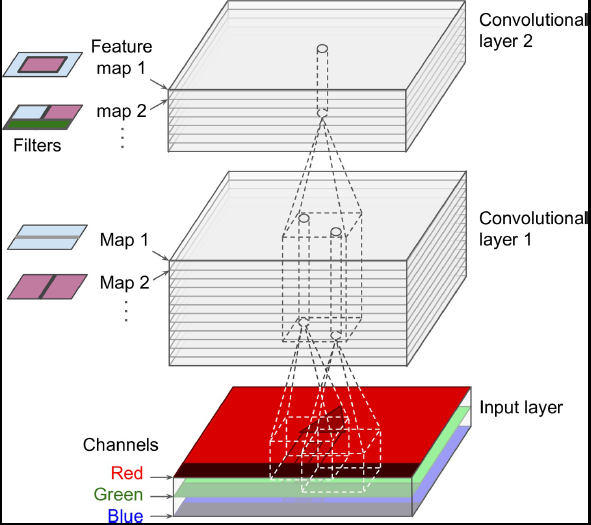

## Implementation
In TensorFlow, each input image is typically represented as a 3D tensor of shape [height, width,
channels].   
A mini-batch is represented as a 4D tensor of shape [mini-batch size, height, width,
channels].   
The weights of a convolutional layer are represented as a 4D tensor of shape [f , f , f ,
f ].   
The bias terms of a convolutional layer are simply represented as a 1D tensor of shape [f ].

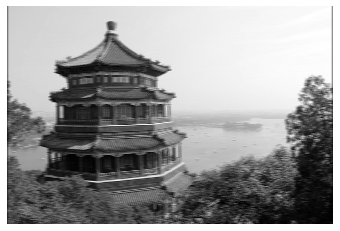

In [12]:
import numpy as np
from sklearn.datasets import load_sample_image

# Load sample images
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

plt.imshow(outputs[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map
plt.axis("off") # Not shown in the book
plt.show()

In [ ]:
# Using keras.layers.Conv2D():
conv = keras.layers.Conv2D(filters=32, kernel_size=3, strides=1,
                           padding="SAME", activation="relu")

Using "SAME" padding is equivalent to padding manually using manual_same_padding() then   
using "VALID" padding (confusingly, "VALID" padding means no padding at all):

## Pooling Layers 

goal is to subsample (i.e., shrink) the input image in order to reduce the computational load, the
memory usage, and the number of parameters (thereby limiting the risk of overfitting).

Just like in convolutional layers, each neuron in a pooling layer is connected to the outputs of a
limited number of neurons in the previous layer, located within a small rectangular receptive field.
You must define its size, the stride, and the padding type, just like before.   
However, **a pooling neuron
has no weights; all it does is aggregate the inputs using an aggregation function such as the max or
mean**

### Max pooling
Only the max input
value in each receptive field propagated to the next layer, while the other inputs are dropped.

It introduces some level of invariance(tolerance) to images with a small amount of rotational
invariance and a slight scale invariance.   
Such invariance (even if it is limited) can be useful in cases
where the prediction should not depend on these details, such as in classification tasks(better generalize, not depend on some small scaling or rotation).

max pooling preserves only the strongest
features, getting rid of all the meaningless ones, so the next layers get a cleaner signal to work with.
Moreover, max pooling offers stronger translation invariance than average pooling, and it requires
slightly less compute

In [ ]:
# The strides default to the kernel size, so this layer will use a stride of 2
max_pool = keras.layers.MaxPool2D(pool_size=2)

## CNN Architectures

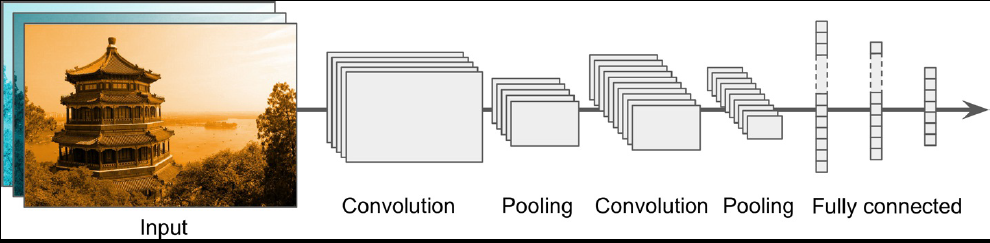

In [37]:
# implement with fashion MNIST
# load data
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_mean = X_train.mean(axis = 0, keepdims= True) # mean of each row
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std # Standardize 
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std
# shift axis
X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [38]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D, # reusable conv2D layer
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(units=128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(units=64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(units=10, activation='softmax'),
])

**Review model**

The first layer uses 64 fairly large filters (7 × 7) but no stride because the input images are
not very large. It also sets input_shape=[28, 28, 1], because the images are 28 × 28
pixels, with a single color channel (i.e., grayscale).

Next we have a max pooling layer which uses a pool size of 2, so it divides each spatial
dimension by a factor of 2.

Then we repeat the same structure twice: two convolutional layers followed by a max
pooling layer. For larger images, we could repeat this structure several more times (the
number of repetitions is a hyperparameter you can tune).

Note that the number of filters grows as we climb up the CNN toward the output layer (it is
initially 64, then 128, then 256): it makes sense for it to grow, since the number of low-level
features is often fairly low (e.g., small circles, horizontal lines), but there are many different
ways to combine them into higher-level features. 

It is a common practice to double the
number of filters after each pooling layer: since a pooling layer divides each spatial
dimension by a factor of 2, we can afford to double the number of feature maps in the next
layer without fear of exploding the number of parameters, memory usage, or computational
load.

Next is the fully connected network, composed of two hidden dense layers and a dense
output layer. Note that we must flatten its inputs, since a dense network expects a 1D array of
features for each instance. We also add two dropout layers, with a dropout rate of 50% each,
to reduce overfitting.

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid),verbose=0)
score = model.evaluate(X_test, y_test)
X_new = X_test[:10] # pretend we have new images
y_pred = model.predict(X_new)
score

**Data augmentation**   
Data augmentation artificially increases the size of the training set by generating many realistic
variants of each training instance. This reduces overfitting, making this a regularization technique.
The generated instances should be as realistic as possible: ideally, given an image from the
augmented training set, a human should not be able to tell whether it was augmented or not.

For example, you can slightly shift, rotate, and resize every picture in the training set by various
amounts and add the resulting pictures to the training set. This forces the
model to be more tolerant to variations in the position, orientation, and size of the objects in the
pictures.

## Different architecture of CNNs

models are getting deeper and deeper, with fewer and fewer parameters. The key to being able
to train such a deep network is to use skip connections (also called shortcut connections): the signal
feeding into a layer is also added to the output of a layer located a bit higher up the stack.

## Using Pretrained Models from Keras

you can load the ResNet-50 model, pretrained on ImageNet, with the
following line of code: with weights pretrained on the ImageNet
dataset

Other vision models are available in keras.applications, including several ResNet variants,
GoogLeNet variants like Inception-v3 and Xception, VGGNet variants, and MobileNet and
MobileNetV2 (lightweight models for use in mobile applications).

In [42]:
model = keras.applications.resnet50.ResNet50(weights = 'imagenet')

102973440/102967424 [==============================] - 12s 0us/step


To use it ensure that the images have the right size. A ResNet-50 model
expects 224 × 224-pixel, So use TensorFlow’s tf.image.resize() or tf.image.crop_and_resize() incase want to keep the same aspect ratio

In [47]:
images_resized = tf.image.resize(images, [224, 224])

The pretrained models assume that the images are preprocessed in a specific way. In some cases they
may expect the inputs to be scaled from 0 to 1, or –1 to 1, and so on. Each model provides a
preprocess_input() function that you can use to preprocess your images.

In [48]:
inputs = keras.applications.resnet50.preprocess_input(images_resized *255)

In [49]:
# make prediction
Y_proba = model.predict(inputs)

display the top K predictions, including the class name
and the estimated probability of each predicted class, use the decode_predictions()

In [50]:
top_K = keras.applications.resnet50.decode_predictions(Y_proba, top=3)
for image_index in range(len(images)):
    print("Image #{}".format(image_index))
    for class_id, name, y_proba in top_K[image_index]:
        print("  {} - {:12s} {:.2f}%".format(class_id, name, y_proba * 100))
    print()

40960/35363 [==================================] - 0s 1us/step
Image #0
  n02825657 - bell_cote    82.35%
  n03877845 - palace       6.75%
  n03781244 - monastery    4.19%

Image #1
  n03530642 - honeycomb    49.83%
  n13040303 - stinkhorn    33.95%
  n02206856 - bee          4.35%



The correct classes (monastery and daisy) appear in the top three results for both images. That’s
23
pretty good, considering that the model had to choose from among 1,000 classes.

## Pretrained Models for Transfer Learning
If you want to build an image classifier but you do not have enough training data, then it is often a
good idea to reuse the lower layers of a pretrained model

let’s train a model to classify pictures of flowers, reusing a pretrained Xception model

In [54]:
import tensorflow_datasets as tfds
dataset, info = tfds.load("tf_flowers", as_supervised=True, with_info=True)
dataset_size = info.splits["train"].num_examples # 3670
class_names = info.features["label"].names # ["dandelion", "daisy", ...]
n_classes = info.features["label"].num_classes # 5

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.





Dataset tf_flowers downloaded and prepared to C:\Users\PK\tensorflow_datasets\tf_flowers\3.0.0. Subsequent calls will reuse this data.


In [56]:
# split data to train, valid and test
test_set_raw, valid_set_raw, train_set_raw = tfds.load(
    "tf_flowers",
    split=["train[:10%]", "train[10%:25%]", "train[25%:]"],
    as_supervised=True)

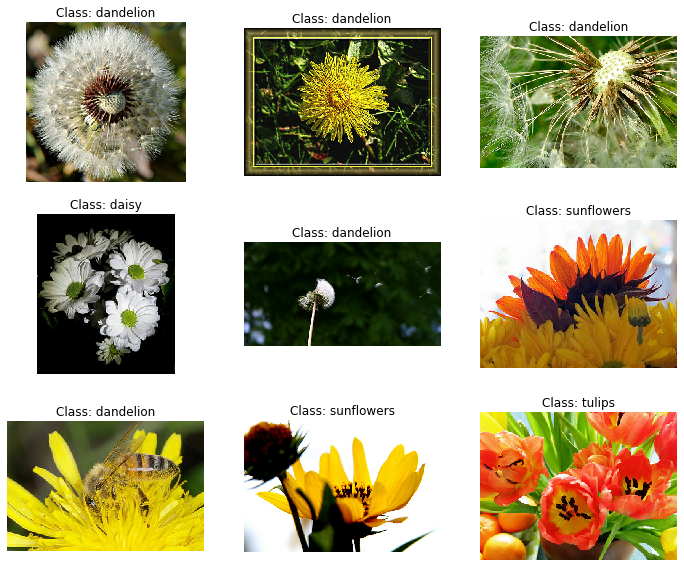

In [57]:
plt.figure(figsize=(12, 10))
index = 0
for image, label in train_set_raw.take(9):
    index += 1
    plt.subplot(3, 3, index)
    plt.imshow(image)
    plt.title("Class: {}".format(class_names[label]))
    plt.axis("off")

plt.show()

Next we must preprocess the images. The CNN expects 224 × 224 images, so we need to resize them

In [58]:
def central_crop(image): # data augmentation
    shape = tf.shape(image)
    min_dim = tf.reduce_min([shape[0], shape[1]])
    top_crop = (shape[0] - min_dim) // 4
    bottom_crop = shape[0] - top_crop
    left_crop = (shape[1] - min_dim) // 4
    right_crop = shape[1] - left_crop
    return image[top_crop:bottom_crop, left_crop:right_crop]

def random_crop(image): # data augmentation
    shape = tf.shape(image)
    min_dim = tf.reduce_min([shape[0], shape[1]]) * 90 // 100
    return tf.image.random_crop(image, [min_dim, min_dim, 3])

def preprocess(image, label, randomize=False): 
    if randomize:
        cropped_image = random_crop(image)# data augmentation crop
        cropped_image = tf.image.random_flip_left_right(cropped_image)
    else:
        cropped_image = central_crop(image)
    resized_image = tf.image.resize(cropped_image, [224, 224]) #resize
    final_image = keras.applications.xception.preprocess_input(resized_image)
    return final_image, label

batch_size = 32 # apply to all data
train_set = train_set_raw.shuffle(1000).repeat()
train_set = train_set.map(partial(preprocess, randomize=True)).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(preprocess).batch(batch_size).prefetch(1)
test_set = test_set_raw.map(preprocess).batch(batch_size).prefetch(1)

load an Xception model, pretrained on ImageNet. exclude the top of the network by
setting include_top=False: this excludes the global average pooling layer and the dense output
layer.

then add our own global average pooling layer, based on the output of the base model,
followed by a dense output layer with one unit per class, using the softmax activation function

In [59]:
base_model = keras.applications.xception.Xception(weights="imagenet",include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation="softmax")(avg)
model = keras.Model(inputs=base_model.input, outputs=output)

83689472/83683744 [==============================] - 19s 0us/step


it’s usually a good idea to freeze the weights of the pretrained layers, at
least at the beginning of training:

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# complie and train
optimizer = keras.optimizers.SGD(lr=0.2, momentum=0.9, decay=0.01)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,metrics=["accuracy"])
history = model.fit(train_set,
                    steps_per_epoch=int(0.75 * dataset_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=5)

After training the model for a few epochs, its validation accuracy should reach about 75–80% and
stop making much progress. This means that the top layers are now pretty well trained, so we are
ready to unfreeze all the layers (or you could try unfreezing just the top ones) and continue training
(don’t forget to compile the model when you freeze or unfreeze layers).

In [ ]:
for layer in base_model.layers:
    layer.trainable = True

optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9,nesterov=True, decay=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,metrics=["accuracy"])
history = model.fit(train_set,
                    steps_per_epoch=int(0.75 * dataset_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=40)

## Classification and Localization

Localizing an object in a picture can be expressed as a regression task.

to
predict a bounding box around the object, a common approach is to predict the horizontal and vertical
coordinates of the object’s center, as well as its height and width. This means we have four numbers
to predict.

need to add a second dense output
layer with four units and train using
the MSE loss:

In [ ]:
base_model = keras.applications.xception.Xception(weights="imagenet",include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
class_output = keras.layers.Dense(n_classes, activation="softmax")(avg)
loc_output = keras.layers.Dense(4)(avg)
model = keras.models.Model(inputs=base_model.input,outputs=[class_output, loc_output])
model.compile(loss=["sparse_categorical_crossentropy", "mse"],
              loss_weights=[0.8, 0.2], # depends on what you care most about
              optimizer=optimizer, metrics=["accuracy"])

But now we have a problem: the flowers dataset does not have bounding boxes around the flowers.
So, we need to add them ourselves. This is often one of the hardest and most costly parts of a
Machine Learning project: getting the labels.

may want to use an open source image labeling tool like
VGG Image Annotator, LabelImg, OpenLabeler, or ImgLab, or perhaps a commercial tool like
LabelBox or Supervisely

You then need to create a dataset whose items
will be batches of preprocessed images along with their class labels and their bounding boxes. Each
item should be a tuple of the form (images, (class_labels, bounding_boxes)). Then you are
ready to train your model!

## Object Detection

classifying and localizing **multiple objects in an image**  slide the CNN through the whole image across regions of different sizes.

MEAN AVERAGE PRECISION (MAP)  


# 15. Processing Sequences Using RNNs and CNNs.
they can work on sequences of
arbitrary lengths, rather than on fixed-sized inputs like all the nets we have considered so far.  
For
example, they can take sentences, documents, or audio samples as input, making them extremely useful
for natural language processing applications such as automatic translation or speech-to-text.

## Recurrent Neurons and Layers

each time step t, every neuron receives both the
input vector x(t) and the output vector from the previous time step y(t-1) so each neuron has 2 sets of weights

compute a recurrent layer’s output(y) in one shot for a
whole mini-batch by placing all the inputs at time step t in an input matrix so at y(t-1), it takes all consideration of x(0) , x(1), .... x(t)

## Input and Output Sequences

1. *sequence-to-sequence network* take a sequence of inputs and produce a sequence of outputs. useful for predicting time series such as stock prices: you feed it the prices over the last N days, and it must output the prices shifted by one day into the future 


2. *sequence-to-vector* take sequence of inputs and ignore all outputs except for the last one.useful for network a sequence of words corresponding to a movie review, and the network would output a sentiment score (e.g., from –1 [hate] to +1 [love]).

3. *vector-to sequence network.* feed the network the same input vector over and over again at each time step and let it output a sequence. Example input are image or the output of a CNN and output could be a caption for that image

4. *encoder*, sequence-to-vector network and *decoder*, vector-to sequence network, this could be used for translating a sentence from one language to another. Better than RNN because the last words of a sentence can affect the first words of the translation, so you need to wait until you have seen the whole sentence before translating it.


## Training RNNs
*backpropagation through time (BPTT)*.

1. a first forward pass through the unrolled network
2. the output sequence is evaluated using a cost function
3. The gradients of that cost function are then propagated backward through the unrolled network
4. Finally the model parameters are updated using the gradients computed during BPTT. Note that the gradients flow backward through all the outputs used by the cost function, not just through the final output

## Forecasting a Time Series


In [3]:
# create toy time Series
def generate_time_series(batch_size , n_steps): # (length n_steps)
    '''
    returns a NumPy array of shape [batch size, time steps, 1], where each series is the sum of
    two sine waves of fixed amplitudes but random frequencies and phases, plus a bit of noise.
    '''
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1) #4D, batch row , 1C
    time = np.linspace(0,1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10)) # wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5) # + noise
    return series[..., np.newaxis].astype(np.float32)

In [4]:
# create training, test, valid
n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [6]:
X_train.shape, y_train.shape ,X_valid.shape, y_valid.shape ,X_test.shape, y_test.shape

((7000, 50, 1), (7000, 1), (2000, 50, 1), (2000, 1), (1000, 50, 1), (1000, 1))

### Baseline Model (forecast 1 step ahead)
Simplest approach is to predict with the last value in each series.
#### Predict with t-1 value

In [5]:
from tensorflow.keras import losses
y_pred = X_valid[:,-1]
print('MSE is {}'.format(np.mean(losses.mean_squared_error(y_valid,y_pred))))

MSE is 0.020211366936564445


In [16]:
from plot import eda_plot # custom module

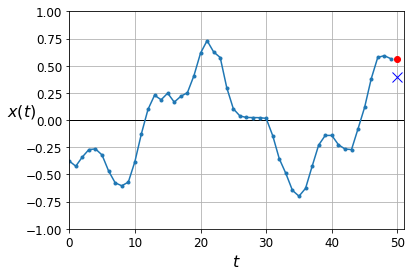

In [8]:
eda_plot.plot_series(X_valid[0, :, 0], 50, y_valid[0, 0], y_pred[0, 0])
plt.show()

Another simple approach is 

####  Simple fully connected network(linear regression).

In [6]:
tf.random.set_seed(42)
model = models.Sequential([
    layers.Flatten(input_shape=[50, 1]),
    layers.Dense(1)
])

model.compile(loss="mse", optimizer="adam")

history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid), verbose = 0)
model.evaluate(X_valid, y_valid)

2000/2000 [==============================] - 0s 17us/sample - loss: 0.0041


0.004145485986024142

In [8]:
from mlmetrics import Neural_net_eval # custom model

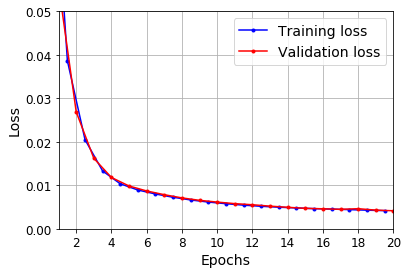

In [12]:
Neural_net_eval.plot_learning_curves(history.history["loss"], history.history["val_loss"])

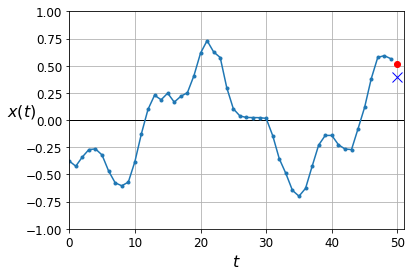

In [21]:
y_pred = model.predict(X_valid)
eda_plot.plot_series(X_valid[0, :, 0], 50, y_valid[0, 0], y_pred[0, 0])
plt.show()

#### Simple RNN

We do not need to specify the length of the input sequences (unlike in the
previous model), since a recurrent neural network can process any number of time steps (this is why
we set the first input dimension to None).

An RNN layer must have three-dimensional inputs: the first dimension is the batch dimension
(its size is the batch size), the second dimension represents the time (its size is the number of
time steps), and the third dimension holds the inputs at each time step (its size is the number
of input features per time step). 

In [23]:
model = models.Sequential([
    layers.SimpleRNN(1, input_shape=[None, 1])  # RNN single layer, with a single neuron
])

optimizer = tf.keras.optimizers.Adam(lr=0.005)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid),verbose = 0)

In [24]:
model.evaluate(X_valid, y_valid)

2000/2000 [==============================] - 0s 53us/sample - loss: 0.0109


0.010897529304027558

better than the naive approach but it does not beat a
simple linear model.

### Deep RNNS
just stack recurrent layers. In this example, we use three SimpleRNN layers

By default, recurrent layers in Keras only return the final output. To make them return one output per time step, you must
set return_sequences=True, as we will see.

In [28]:
model = models.Sequential([
    layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]), # 20 neurons
    layers.SimpleRNN(20, return_sequences=True),
    layers.SimpleRNN(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid),verbose  = 0)

model.evaluate(X_valid, y_valid)

2000/2000 [==============================] - 0s 173us/sample - loss: 0.0030


0.0029863261841237545

### Forecasting Several Time Steps Ahead

to predict 10 steps
ahead, just change the targets to be the value 10 steps ahead instead of 1 step ahead (instead of using target as y(t+1) we can use y(t+10)).

But what if we
want to predict the next 10 values?
- first option is predict next value on the predicted previous value (acting as if this predicted value had actually occurred), which perform worse that linear regression because the error accumulate
- second option is train an RNN to predict all 10 next values at once We can still use a sequence-to-vector model, but it will output 10 values instead of 1

In [55]:
# modify target to contain next 10 values
np.random.seed(42)

series = generate_time_series(10000, n_steps + 10)
X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:, 0] # x contain t0-t50 and y contain t 51-60
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

In [62]:
model = models.Sequential([
    layers.SimpleRNN(20,return_sequences = True, input_shape = [None,1]),
    layers.SimpleRNN(20),
    layers.Dense(10) # using last layers as dense is much faster, output layer to have 10 units instead of 1:
])

model.compile(loss = 'mse', optimizer = 'adam')
history  = model.fit(X_train, Y_train, validation_data = (X_valid,Y_valid), verbose = 0)

In [68]:
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    eda_plot.plot_series(X[0, :, 0],10)
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "ro-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "bx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)

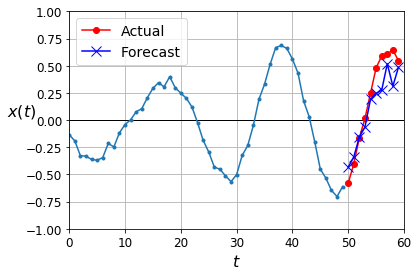

In [69]:
# generate 10 more steps
series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, -10:, :]
# predict next 10
Y_pred = model.predict(X_new)[..., np.newaxis]

plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

much better than linear model

However, instead of training the model to forecast the next
10 values only at the very last time step, we can train it to forecast the next 10 values at each and
every time step. 

 That is, instead of just forecasting time steps 50 to 59 based on time steps 0 to 49, it will forecast time steps 1 to 10 at time step 0, then time steps 2 to 11 at time step 1, and so on, and finally it will forecast time steps 50 to 59 at the last time step.

In other words, we can turn this sequence-to-vector RNN into a sequence-tosequence
RNN. The advantage of this technique is that the loss will contain a term for the output of
the RNN at each and every time step, not just the output at the last time step

targets will contain values that appear in the inputs (there is a lot of overlap between X_train
and Y_train)

at each time step, the model only knows about past time steps, so it
cannot look ahead. It is said to be a causal model.

In [121]:
series = generate_time_series(10000, n_steps + 10)
X_train = series[:7000, :n_steps]
X_valid = series[7000:9000, :n_steps]
X_test = series[9000:, :n_steps]
Y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
    Y[..., step_ahead - 1] = series[..., step_ahead:step_ahead + n_steps, 0]
Y_train = Y[:7000] # y_train[0] contain X [1 : 10], y_train[1] for X[2:11] and ... y_train[50] for X[50:59] 
Y_valid = Y[7000:9000]
Y_test = Y[9000:]

In [122]:
X_train.shape, Y_train.shape

((7000, 50, 1), (7000, 50, 10))

In [124]:
np.random.seed(42)
tf.random.set_seed(42)

model = models.Sequential([
    layers.SimpleRNN(20,return_sequences=True, input_shape = [None,1]),
    layers.SimpleRNN(20,return_sequences=True),
    layers.TimeDistributed(layers.Dense(10)) # this act as Dense after every RNN layer to output
    
])

All outputs are needed during training, but only the output at the last time step is useful for predictions
and for evaluation. So although we will rely on the MSE over all the outputs for training, we will use
a custom metric for evaluation, to only compute the MSE over the output at the last time step:

In [129]:
def last_time_step_mse(Y_true, Y_pred):
    return metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(lr=0.01), metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,validation_data=(X_valid, Y_valid),verbose = 0)

We get a validation MSE of about 0.006, which is 25% better than the previous model. You can
combine this approach with the first one: just predict the next 10 values using this RNN, then
concatenate these values to the input time series and use the model again to predict the next 10 values,
and repeat the process as many times as needed. With this approach, you can generate arbitrarily long
sequences. It may not be very accurate for long-term predictions,

In [130]:
model.evaluate(X_valid, Y_valid)

2000/2000 [==============================] - 0s 153us/sample - loss: 0.0171 - last_time_step_mse: 0.0058


[0.01711283940076828, 0.005787683]

## Long Short-Term Memory (LSTM) cell
Due to the transformations that the data goes through when traversing an RNN, some information is
lost at each time step. After a while, the RNN’s state contains virtually no trace of the first inputs.
This can be a showstopper called *long term memory cell*

LSTM cell can learn to recognize an important input (that’s the role of the input gate),
store it in the long-term state, preserve it for as long as it is needed (that’s the role of the forget gate),
and extract it whenever it is needed. This explains why these cells have been amazingly successful at
capturing long-term patterns in time series, long texts, audio recordings, and more.

In [133]:
np.random.seed(42)
tf.random.set_seed(42)

model = models.Sequential([
    layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
    layers.LSTM(20, return_sequences=True),
    layers.TimeDistributed(layers.Dense(10))
])
model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,validation_data=(X_valid, Y_valid),verbose = 0)
model.evaluate(X_valid, Y_valid)

2000/2000 [==============================] - 1s 349us/sample - loss: 0.0235 - last_time_step_mse: 0.0081


[0.023477923259139062, 0.008099066]

still have a fairly limited short-term memory,
and they have a hard time learning long-term patterns in sequences of 100 time steps or more.

One way to solve this is to shorten the input
sequences, for example using 1D convolutional layers.

### Using 1D convolutional layers to process sequences

a 1D
convolutional layer slides several kernels across a sequence, producing a 1D feature map per kernel.
Each kernel will learn to detect a single very short sequential pattern (no longer than the kernel size).
If you use 10 kernels, then the layer’s output will be composed of 10 1-dimensional sequences (all of
the same length), or equivalently you can view this output as a single 10-dimensional sequence. This
means that you can build a neural network composed of a mix of recurrent layers and 1D
convolutional layers

In [ ]:
model = models.Sequential([
    layers.Conv1D(filters=20, kernel_size=4, strides=2, padding="valid",
    input_shape=[None, 1]),
    layers.GRU(20, return_sequences=True),
    layers.GRU(20, return_sequences=True),
    layers.TimeDistributed(keras.layers.Dense(10))
    ])
model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train[:, 3::2], epochs=20,
validation_data=(X_valid, Y_valid[:, 3::2]))